In [36]:
# Install dtreeviz library
!pip -qq install dtreeviz

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap                                    # to import color map
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor          # to import DT classifier and Regressor
import graphviz                                                                 # to import graphviz
from dtreeviz import trees # Import the trees submodule instead of dtreeviz
%matplotlib inline

# Instead of calling dtreeviz directly, you'll use it like this:
# viz = trees.dtreeviz(your_tree_model, ...)

In [38]:
# Prepare the data into X (predictor) and Y (target), considering sepal length and width
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [39]:
# Fit the DT classifier with max_depth = 2
clf = DecisionTreeClassifier(max_depth = 2, random_state=1234)
model = clf.fit(X, y)

In [40]:
text_representation = tree.export_text(clf)
# Display result
print(text_representation)

|--- feature_0 <= 2.45
|   |--- class: 0
|--- feature_0 >  2.45
|   |--- feature_1 <= 1.75
|   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- class: 2



In [41]:
# Save in figure
with open("decision_tree.log", "w") as f_out:
    f_out.write(text_representation)

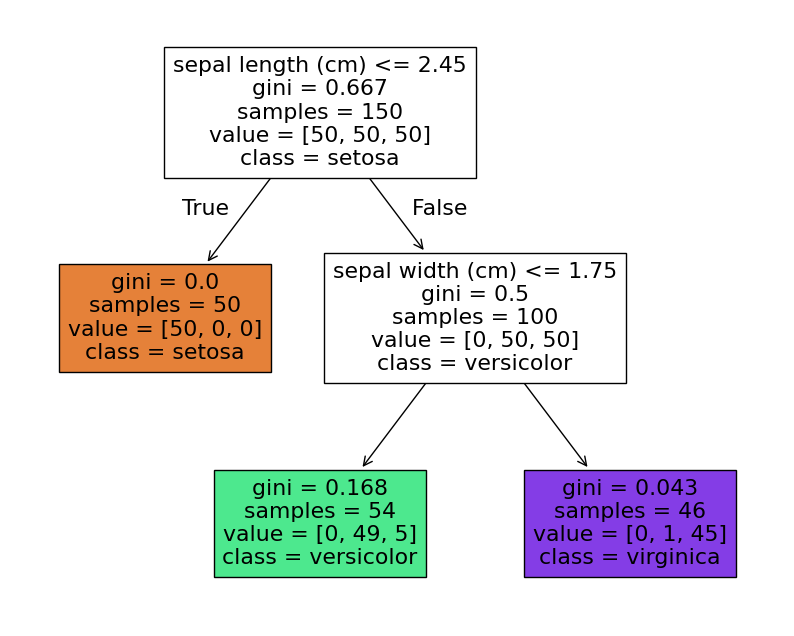

In [42]:
# Visualize tree
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)                           # filled = True uses color coding for majority of classes

In [43]:
# Save the figure to the .png file
fig.savefig("decision_tree.png")

In [44]:
# Predicting probability of a class
clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [45]:
# Predicting a class
clf.predict([[5, 1.5]])

array([1])

In [46]:
# Load iris dataset and define variables with sepal length and width
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

# First tree without restrictions
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Second tree with hyperparameters
tree_clf2 = DecisionTreeClassifier(max_depth =2, min_samples_leaf =1, min_samples_split = 2, random_state=2)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [47]:
# Define a function for plotting decision boundary
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris = True, legend=False, plot_training=True):

    # define array for x1 and x2 axes
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)

    # make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids
    x1, x2 = np.meshgrid(x1s, x2s)

    # the numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # predict and reshape the y_pred according to x
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # module is used for mapping numbers to colors or color specification conversion in a 1-D array of colors also known as colormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if plot_training:
        # plot Setosa in yellow
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        # plot Versicolor in blue
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        # plot Virginica in green
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)

    if iris:
        # define x_axes label
        plt.xlabel("Sepal length", fontsize=14)
        # define y_axes label
        plt.ylabel("Sepal width", fontsize=14)

    if legend:
        plt.legend(loc="lower right", fontsize=14)

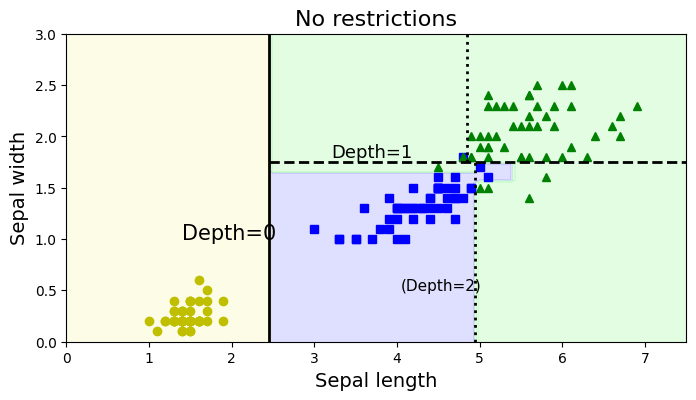

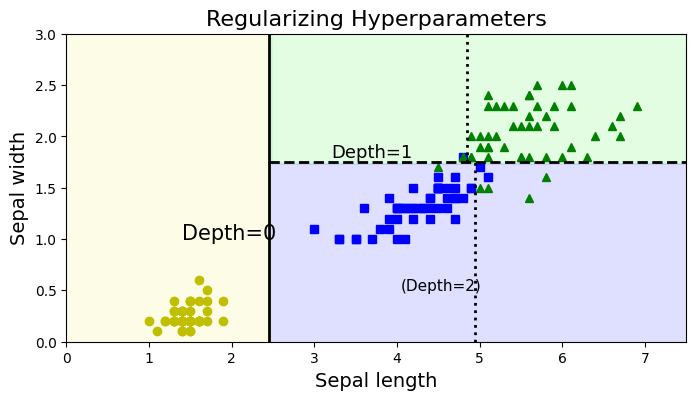

In [48]:
# Plot both the decision tree
plt.figure(figsize=(8, 4))

# call the plot_decision_boundary function for tree_clf
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.title("No restrictions", fontsize=16)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.figure(figsize=(8, 4))

# call the plot_decision_boundary function for tree_clf2
plot_decision_boundary(tree_clf2, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.title("Regularizing Hyperparameters", fontsize=16)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [49]:
# Prepare the data
# Instead of using the removed load_boston function,
# we will fetch the California housing dataset as an alternative.
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target
housing.feature_names  # Access the feature names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [50]:
# Fit the regressor, set max_depth = 3
dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = dt.fit(X, y)

In [51]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 5.04
|   |--- feature_0 <= 3.07
|   |   |--- feature_2 <= 4.31
|   |   |   |--- value: [1.62]
|   |   |--- feature_2 >  4.31
|   |   |   |--- value: [1.16]
|   |--- feature_0 >  3.07
|   |   |--- feature_5 <= 2.37
|   |   |   |--- value: [2.79]
|   |   |--- feature_5 >  2.37
|   |   |   |--- value: [1.88]
|--- feature_0 >  5.04
|   |--- feature_0 <= 6.82
|   |   |--- feature_5 <= 2.74
|   |   |   |--- value: [3.39]
|   |   |--- feature_5 >  2.74
|   |   |   |--- value: [2.56]
|   |--- feature_0 >  6.82
|   |   |--- feature_0 <= 7.82
|   |   |   |--- value: [3.73]
|   |   |--- feature_0 >  7.82
|   |   |   |--- value: [4.57]



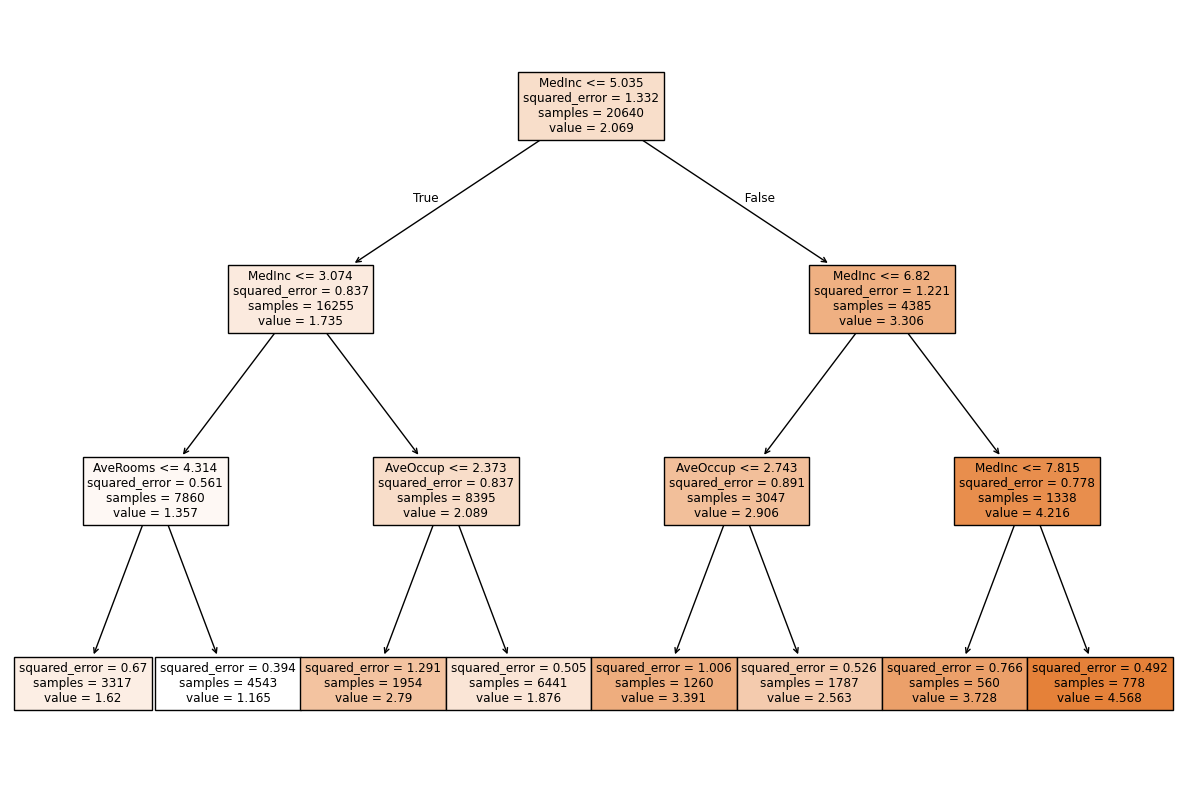

In [52]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
#from sklearn.datasets import load_boston  # Remove this line - load_boston is deprecated
from sklearn.datasets import fetch_california_housing # Import fetch_california_housing instead

# Load the California Housing dataset
housing = fetch_california_housing() # Load the dataset and assign it to housing

# Assuming X and y are already defined and represent the features and target variable

# Fit the regressor, set max_depth = 3
dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = dt.fit(X, y)

# Visualize tree using plot_tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt, feature_names=housing.feature_names, filled=True) # Use housing.feature_names
plt.show() # Display the plot

In [53]:
!pip install graphviz
import graphviz
from sklearn import tree


# Visualize tree using graphviz
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=housing.feature_names, # Changed boston to housing
                                filled=True)
graphviz.Source(dot_data, format="png")

Defaulting to user installation because normal site-packages is not writeable


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [54]:
from dtreeviz import model  # Import the new model API
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_data = fetch_california_housing()

# Extract features and target
X = california_data.data
y = california_data.target

# Convert to pandas DataFrame for easier handling
X_df = pd.DataFrame(X, columns=california_data.feature_names)
feature_names = list(X_df.columns)  # List of feature names
target_name = "House Value"         # Target name

# Train a Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, y)

# Create the decision tree visualization using the new API
viz_model = model(dt, X_df, y,
                  target_name=target_name,
                  feature_names=feature_names)

# Display the visualization
viz_model.view()

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [55]:
# Define plot regression function

def plot_regression_predictions(tree_reg, X, y, axes=[0.3, 1, 0, 60], ylabel="$y$"):
    # creating the x-axes grid in array
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    # define y
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)

    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)

    plt.plot(X, y, "b.")
    # plot y hat (predicted values) in red line in both graphs
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

In [56]:
# Take index value 4 i.e, NOX (for the 'NOX' feature)
# X = boston.iloc[:, 4:5]  # Use .iloc to select columns by position
# or
X = boston[['nox']]       # Use column name directly for better readability - Changed 'NOX' to 'nox' (43rd cell; nox)

y = boston["medv"]      # Assuming 'medv'

NameError: name 'boston' is not defined

In [ ]:
# Define model with no hyperparameter
dt = DecisionTreeRegressor(random_state=1234)
dt.fit(X, y)

# Define model with maximum depth = 8
dt2 = DecisionTreeRegressor(max_depth=8, random_state=1234)
dt2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])

# Plot decision boundary
plot_regression_predictions(dt2, X, y)

for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    # Plot the fit regression line
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=8", fontsize=14)

plt.sca(axes[1])
# Plot dcision boundary
plot_regression_predictions(dt, X, y, ylabel=None)

for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    # Plot the fit regression line
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.title("max_depth=No restriction", fontsize=14)
plt.text(0.3,1, "X1 = NOX feature", fontsize=10)
plt.show()